In [2]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep

from utils import *
from plotting import *

import matplotlib as mpl
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
plt.rc('font', size=16)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [3]:
C = 29.9792458 #cm/ns

In [4]:
#filename = 'root_files/histo_2Pions_vertex_100_etl.root'
#filename = 'root_files/histo_2PionsVertex_betamtd.root'
filename = 'root_files/histo_2Pions_20891_tMtd.root'

file = uproot.open(filename)

In [5]:
file.keys()

['ticlNtuplizer;1',
 'ticlNtuplizer/tracksters;1',
 'ticlNtuplizer/clusters;1',
 'ticlNtuplizer/graph;1',
 'ticlNtuplizer/candidates;1',
 'ticlNtuplizer/trackstersMerged;1',
 'ticlNtuplizer/associations;1',
 'ticlNtuplizer/simtrackstersSC;1',
 'ticlNtuplizer/simtrackstersCP;1',
 'ticlNtuplizer/fineSimTracksters;1',
 'ticlNtuplizer/tracks;1',
 'ticlNtuplizer/simTICLCandidate;1',
 'ticlNtuplizer/ETL;1']

In [6]:
simtrackstersSC = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]
tracksters = file["ticlNtuplizer/tracksters"]
tracks = file["ticlNtuplizer/tracks"]
ETLclusters = file["ticlNtuplizer/ETL"]
simTICLCandidate = file["ticlNtuplizer/simTICLCandidate"]

In [7]:
tracks.keys()

['track_ev',
 'track_id',
 'track_hgcal_x',
 'track_hgcal_y',
 'track_hgcal_z',
 'track_hgcal_eta',
 'track_hgcal_phi',
 'track_hgcal_px',
 'track_hgcal_py',
 'track_hgcal_pz',
 'track_pt',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_nhits']

In [8]:
SC_vx = simtrackstersSC["vertices_x"].array()
SC_vy = simtrackstersSC["vertices_y"].array()
SC_vz = simtrackstersSC["vertices_z"].array()
SC_ve = simtrackstersSC["vertices_energy"].array()
SC_vi = simtrackstersSC["vertices_indexes"].array()
SC_vt = simtrackstersSC["vertices_time"].array()
SC_vtErr = simtrackstersSC["vertices_timeErr"].array()
SC_vm = simtrackstersSC["vertices_multiplicity"].array()

SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_be = simtrackstersSC["raw_energy"].array()

CP_vx = simtrackstersCP["vertices_x"].array()
CP_vy = simtrackstersCP["vertices_y"].array()
CP_vz = simtrackstersCP["vertices_z"].array()
CP_ve = simtrackstersCP["vertices_energy"].array()
CP_vi = simtrackstersCP["vertices_indexes"].array()
CP_vt = simtrackstersCP["vertices_time"].array()
CP_vtErr = simtrackstersCP["vertices_timeErr"].array()
CP_vm = simtrackstersCP["vertices_multiplicity"].array()

CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()
CP_be = simtrackstersCP["raw_energy"].array()

In [9]:
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_err = simtrackstersSC["timeError"].array()
SC_boundary_time = simtrackstersSC["BoundaryTime"].array()
SC_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
SC_MTD_time = simtrackstersSC["MTDtime"].array()
SC_MTD_err = simtrackstersSC["MTDtimeError"].array()
SC_tMTD = simtrackstersSC["tMTDtime"].array()
SC_tMTD_err = simtrackstersSC["tMTDtimeError"].array()
SC_trIdx = simtrackstersSC["trackIdx"].array()

CP_CALO_time = simtrackstersCP["time"].array()
CP_CALO_err = simtrackstersCP["timeError"].array()
CP_boundary_time = simtrackstersCP["BoundaryTime"].array()
CP_boundary_err = simtrackstersCP["BoundaryTimeError"].array()
CP_MTD_time = simtrackstersCP["MTDtime"].array()
CP_MTD_err = simtrackstersCP["MTDtimeError"].array()
CP_tMTD = simtrackstersCP["tMTD"].array()
CP_tMTD_err = simtrackstersCP["tMTDError"].array()
CP_trIdx = simtrackstersCP["trackIdx"].array()

trIdx = tracks["track_id"].array()

In [10]:
ETL_time    = ETLclusters["mtd_clusters_time"].array()
ETL_timeErr = ETLclusters["mtd_clusters_timeErr"].array()
ETL_vx = ETLclusters["mtd_clusters_x"].array()
ETL_vy = ETLclusters["mtd_clusters_y"].array()
ETL_vz = ETLclusters["mtd_clusters_z"].array()

ETL_t0   = ETLclusters["track_t0"].array()
ETL_tmtd = ETLclusters["track_tmtd"].array()
ETL_beta = ETLclusters["track_mtdbeta"].array()

In [11]:
print([len(ETL_tmtd[i]) for i in range(50)])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [12]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()

SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()

In [13]:
print(f'There are {len(SC_CALO_time)} events in the file')

There are 300 events in the file


## Plot the times

In [14]:
def plot(X, bins=30, title='title', xlabel='time', ylabel='Counts'):
    plt.figure()
    plt.hist(ak.flatten(X)[np.where(ak.flatten(X)>-99)], bins=bins, color='dodgerblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

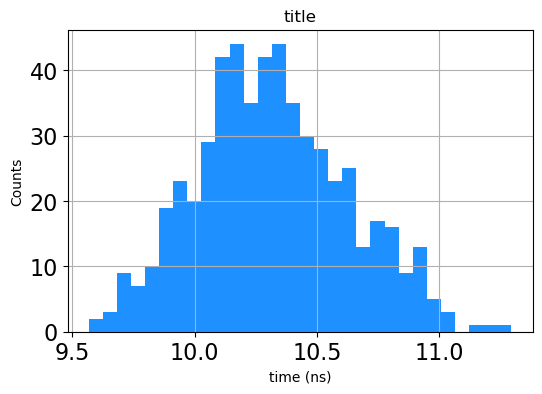

5579

In [15]:
hist(SC_tMTD[SC_tMTD>0])
len(ak.flatten(SC_tMTD))

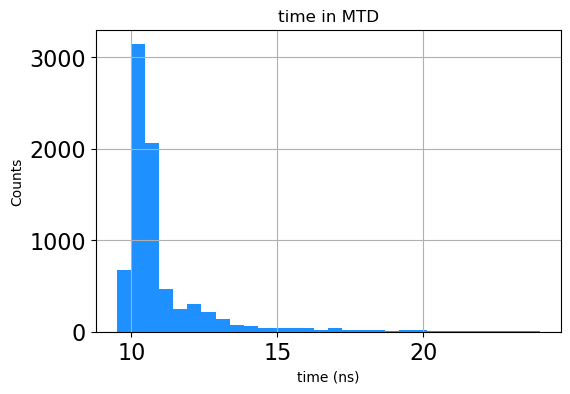

In [16]:
hist(ETL_time[ETL_time>1], title='time in MTD')

In [17]:
def subplot(axs, X, bins=30, title='title', xlabel='time', ylabel='Counts'):
    axs.hist(ak.flatten(X)[np.where(ak.flatten(X)>-99)], bins=bins, color='dodgerblue')
    axs.set_title(title)
    axs.grid()

In [18]:
#ak.count(SC_CALO_time)
#ak.sum(SC_CALO_time>-98)//100
#len(ak.flatten(SC_MTD_time))

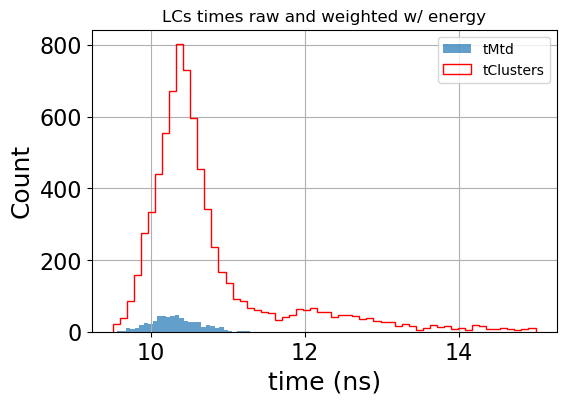

In [19]:
plt.figure(dpi=100)
plt.hist(ak.flatten(ETL_tmtd)[ak.flatten(ETL_tmtd) > 1], bins=30, label='tMtd', alpha=.7)
plt.hist(ak.flatten(ETL_time)[ak.flatten(ETL_time) < 15], bins=60, label='tClusters', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('LCs times raw and weighted w/ energy')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

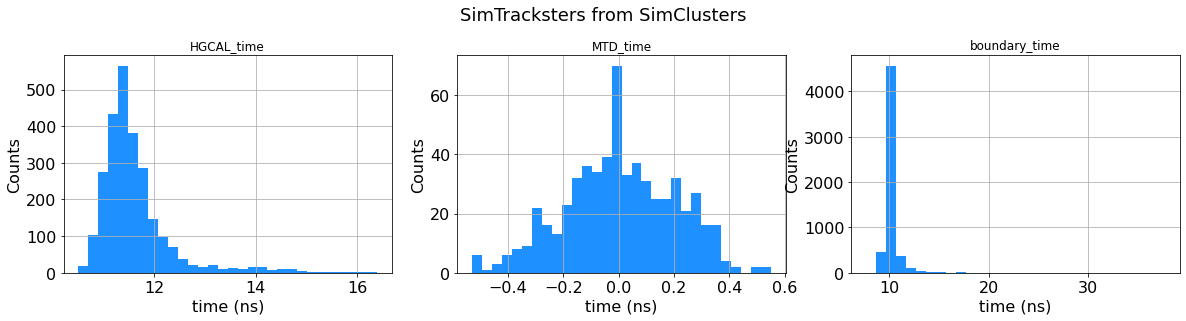

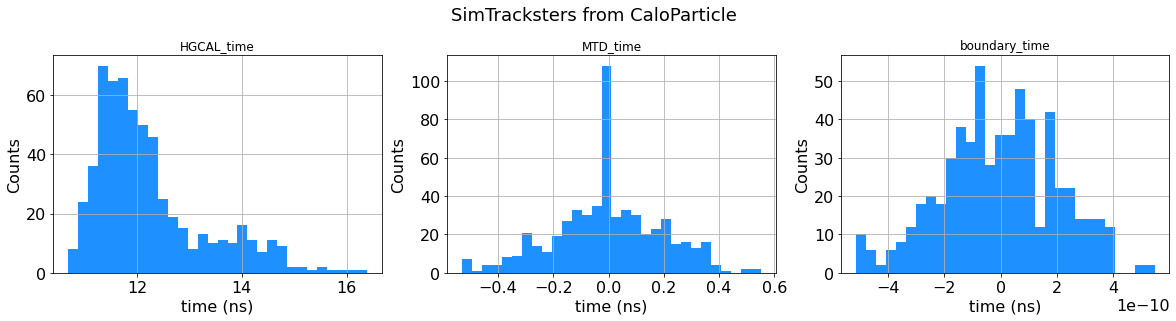

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,4))
fig.suptitle('SimTracksters from SimClusters', size=18, y=1.05)

subplot(axs[0], SC_CALO_time[SC_CALO_time>-80], title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], SC_MTD_time, title='MTD_time')
subplot(axs[2], SC_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)
#-------
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,4))
fig.suptitle('SimTracksters from CaloParticle\n ', size=18, y=1.05)

subplot(axs[0], CP_CALO_time[CP_CALO_time>-80], title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], CP_MTD_time, title='MTD_time')
subplot(axs[2], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

## Visual representation

In [13]:
%matplotlib widget
eid = 299

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_zlim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_ylim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

X = [0,0]
Y = [0,0]
Z = [ak.min(CP_vz[eid]), ak.max(CP_vz[eid])]
ax1.plot(X, Z, Y)#, linewidth=5.)

for x, y, z, e in zip(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid]):
    ax1.scatter(x, z, y, s=8*e)

ax1.set_title(f"SimTrackster layer-clusters ({len(CP_vx[eid])} Trackster)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [50]:
%matplotlib widget
eid = 21
tr_id = 0

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

ax1.set_xlim(ak.min(SC_vx[eid][tr_id]), ak.max(SC_vx[eid][tr_id]))
ax1.set_zlim(ak.min(SC_vy[eid][tr_id]), ak.max(SC_vy[eid][tr_id]))
ax1.set_ylim(ak.min(SC_vz[eid][tr_id]), ak.max(SC_vz[eid][tr_id]))

x = SC_vx[SC_vt>-99.][eid][tr_id]
y = SC_vy[SC_vt>-99.][eid][tr_id]
z = SC_vz[SC_vt>-99.][eid][tr_id]
e = SC_ve[SC_vt>-99.][eid][tr_id]
t = SC_vt[SC_vt>-99.][eid][tr_id]

img = ax1.scatter(x, z, y, s=40*e, alpha=0.5, c=t, cmap=mpl.cm.get_cmap('gist_rainbow'))

tempi = np.linspace(min(t), max(t), 4)

fig.colorbar(img, location='left', ticks=tempi, format='%0.2f',fraction=0.03, pad=0.04)

ax1.set_title(f"SimTrackster layer-clusters ({len(SC_vx[eid][tr_id])} LCs)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Animation

In [16]:
eid = 0
tr_id = 1

deltaT = 0.03 # 30ps
valid_times = CP_vt[eid][tr_id][np.where(CP_vt[eid][tr_id]>-99)]
tmin = min(valid_times)
tmax = max(valid_times)
print('t_min = {:.3f}, t_max = {:.3f}'.format(tmin, tmax))

import pandas as pd

df = pd.DataFrame({"time": np.array(CP_vt[eid][tr_id]),
                   "x" : np.array(CP_vx[eid][tr_id]), 
                   "y" : np.array(CP_vy[eid][tr_id]), 
                   "z" : np.array(CP_vz[eid][tr_id]), 
                   "e" : np.array(CP_ve[eid][tr_id])})
df =  df[df['time']>-98]

nframes = len(df['time'])
times = np.linspace(tmin, tmax, nframes)

t_min = -0.025, t_max = 0.009


In [17]:
%matplotlib widget
plt.style.use('default')

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

def update_graph(num):
    #condition = np.where((CP_vt[eid][tr_id]<=times[n]+deltaT) & (CP_vt[eid][tr_id]>=times[n]-deltaT))
    data=df[(df['time']<=times[num]+deltaT) & (df['time']>=times[num]-deltaT)]
    graph._offsets3d = (data.y, data.x, data.z)
    graph.set_sizes(5*np.array(data.e))
    title.set_text('Single pion, time={:.3f} ns'.format(times[num]))

fig = plt.figure()#dpi=200)
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Single pion')
xlab = ax.set_xlabel('y(cm)')
ax.set_ylabel('x(cm)')
ax.set_zlabel('z(cm)')

#ax.set_ylim(ak.min(CP_vx[eid])-10, ak.max(CP_vx[eid])+10)
#ax.set_xlim(ak.min(CP_vy[eid])-10, ak.max(CP_vy[eid])+10)
#ax.set_zlim(ak.min(CP_vz[eid])-10, ak.max(CP_vz[eid])+10)

data=df[(df['time']<=times[0]+deltaT) & (df['time']>=times[0]-deltaT)]
graph = ax.scatter(data.y, data.x, data.z, s=5*data.e)
#print(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, nframes, 
                               interval=1000, blit=False)

from matplotlib.animation import PillowWriter
#ani.save("singlePion.gif", writer=PillowWriter(fps=1))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## skeleton

In [21]:
from wpca import WPCA, EMPCA

In [22]:
def create_tr_skeletons_single_pca(vx, vy, vz, ve, vt, vi, bx, by, bz, be, bt, ev, tr_id, DST_THR=2.5, bubble_size=10, 
                                   NEIGHBOUR_THR=30, ENERGY_RATIO_THR=0.01, MIN_EDGE_LEN=1, PCA_NEIGHBOUR_THR=1, 
                                  secondary_edges = False):
    # Project the points on pca
    edges, nodes = set(), set()
    covered_nodes = set()
    covered_node_idx = []
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"Reconstruction of a pion in a high-pileup environment\nLayer Clusters")
    ax.set(xlabel="x (cm)", ylabel="y (cm)", zlabel="z (cm)")
    
    vxt = vx[ev][tr_id]
    vyt = vy[ev][tr_id]
    vzt = vz[ev][tr_id]
    vet = ve[ev][tr_id]
    vtt = vt[ev][tr_id]
    #vit = vi[ev][tr_id]

    bxt = bx[ev][tr_id]
    byt = by[ev][tr_id]
    bzt = bz[ev][tr_id]
    bet = be[ev][tr_id]
    btt = bt[ev][tr_id]
  
    #ax.scatter(vxt, vyt, vzt, s=vet*bubble_size, alpha=0.2, c="m", zorder=-5)  

    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    edges.add((tuple(b_coord), tuple(b_coord)))
    nodes.add(tuple(b_coord))
    ax.scatter(bxt, byt, bzt, s=10, c="red", label=f"{len(vet)} LC: {sum(vet):.2f} GeV")

    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    # try create main edges
    min_point = np.zeros(4)
    max_point = np.zeros(4)
    
    for x,y,z,e,i,j in data:

        point = np.array([x, y, z, i])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if min_p[2] > z_cl and point[3]>-80:
                min_p = closest_point
                min_point = point
            if max_p[2] < z_cl:# and point[3]>-80:
                max_p = closest_point  
                max_point = point  
                
#         ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="m", zorder=-5)     
    
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            edges.add((tuple(min_p), tuple(b_coord)))
            nodes.add(tuple(min_p))
            ax.plot([bxt, min_p[0]], [byt, min_p[1]], [bzt, min_p[2]], c='red')    

        if not np.allclose(max_p, b_coord, atol=0.1):
            edges.add((tuple(max_p), tuple(b_coord)))
            nodes.add(tuple(max_p))
            ax.plot([bxt, max_p[0]], [byt, max_p[1]], [bzt, max_p[2]], c='green')
    else:
        min_p, max_p = b_coord, b_coord

#     # compute times
#     dist1 = ((min_p[0] - b_coord[0])**2 + (min_p[1] - b_coord[1])**2 + (min_p[2] - b_coord[2])**2)**0.5
#     time1 = (dist1/29.9792458)
    
#     dist2 = ((max_p[0] - b_coord[0])**2 + (max_p[1] - b_coord[1])**2 + (max_p[2] - b_coord[2])**2)**0.5
#     time2 = (dist2/29.9792458)
    
#     print(dist1, time1, dist2, time2)
    
#     # plot times
#     if abs(max_p[2])-abs(min_p[2])>0:
#         ax.text(min_p[0], min_p[1], min_p[2], '%.3f ns' % (btt-time1), size=12) 
#         ax.text(b_coord[0], b_coord[1], b_coord[2], '%.3f ns' % (btt), size=12)
#         ax.text(max_p[0], max_p[1], max_p[2], '%.3f ns' % (btt+time2), size=12)
#     else:
#         ax.text(min_p[0], min_p[1], min_p[2], '%.3f ns' % (btt+time1), size=12) 
#         ax.text(b_coord[0], b_coord[1], b_coord[2], '%.3f ns' % (btt), size=12)
#         ax.text(max_p[0], max_p[1], max_p[2], '%.3f ns' % (btt-time2), size=12)
    
#     print('times:', time1, time2)
    #Build secondary edges
    for x,y,z,e,i,j in data:
        
        if e / max_en > ENERGY_RATIO_THR:
            # and not covered by any edge
            point = np.array([x, y, z])
            min_dist, min_edge, closest_point_edge, closest_endpoint =  find_dist_to_closest_edge_set(point, edges)
            #print(min_dist)
            
            if min_dist < DST_THR:
                # LC covered by some edge already
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="limegreen", zorder=-5)
                covered_nodes.add((x, y, z))
                covered_node_idx.append(j)  
                continue
            else:
                #ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="black", zorder=-5)
                pass

            if not small_trackster and secondary_edges:
                # find neares higher
                # go through all points, if the point is within the Neighbour_threshold
                distances = dist_matrix[j]
                indices = np.argsort(distances)

                for idx in indices:

                    if idx in covered_node_idx and distances[idx] < NEIGHBOUR_THR and vet[idx] > e and abs(vzt[idx]) < abs(z):
                        # found the nearest higher
                        # create an edge - to projection of the nearest higher to the pca
                        #edges[(idx, j)] = (np.array([vxt[idx], vyt[idx], vzt[idx]]), point)
                        ax.plot([vxt[idx], x], [vyt[idx], y], [vzt[idx], z], c='blue')
                        nearest_higher = np.array([vxt[idx], vyt[idx], vzt[idx]])
                        
                        # TODO: check that it lies on the axis!!!!!!!!!!!!!!!
                        dist, closest_point = project_lc_to_pca(nearest_higher, b_coord, segment_end)

                        if not np.allclose(closest_point, point, atol=0.1):
                            edges.add((tuple(closest_point), tuple(point)))
                            nodes.add(tuple(closest_point))
                            nodes.add(tuple(point))
                        ax.plot([closest_point[0], x], [closest_point[1], y], [closest_point[2], z], c='blue')

                        break
        else:
            # if low energy
            pass
            ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="blue", zorder=-5)

    
    print(min_point[3], max_point[3])
    ax.text(min_point[0], min_point[1], min_point[2], '%.3f ns' % (min_point[3]), size=12) 
    ax.text(b_coord[0], b_coord[1], b_coord[2], '%.3f ns' % (btt), size=12)
    ax.text(max_point[0], max_point[1], max_point[2], '%.3f ns' % (max_point[3]), size=12) 
    
    edges.remove((tuple(b_coord), tuple(b_coord)))
    set_axes_equal(ax)
    plt.show()
    return edges, nodes, covered_node_idx

In [23]:
%matplotlib widget
eid = 5
tr_id=0
# create internal edges per each trackster
all_event_edges, all_event_nodes, covered_node_idxs = [], [], []
for tr_id in range(len(CP_bx[eid])):    
    plt.style.use('default')
    internal_trackster_edges, internal_trackster_nodes, covered_node_idx = create_tr_skeletons_single_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi,
                                                                                                          CP_bx, CP_by, CP_bz, CP_be, new_bt, ev=eid,
                                                                                                          tr_id=tr_id, bubble_size=100, 
                                                                                                          secondary_edges = False)
    #print(internal_trackster_edges)
    all_event_edges.append(internal_trackster_edges)
    all_event_nodes.append(internal_trackster_nodes)
    covered_node_idxs.append(covered_node_idx)

NameError: name 'new_bt' is not defined

## time propagation

In [22]:
all_event_nodes

[{(93.70902275958237, -44.94354311112563, 343.5547508260653),
  (101.59244537353516, -48.838436126708984, 372.287109375),
  (140.19197713361123, -67.90896602460145, 512.9691000104624)},
 {(-137.11875839262888, 63.93207191234593, -496.7574557159888),
  (-108.18241882324219, 50.571632385253906, -388.6514587402344),
  (-98.72736296580662, 46.20605941063379, -353.3274248389007)}]

In [ ]:
def nodes_pca_single(vx, vy, vz, ve, vt, vi, 
                     bx, by, bz, be, bt, 
                     ev, tr_id,
                     ENERGY_RATIO_THR=0.01, PCA_NEIGHBOUR_THR=1):
    # Project the points on pca
    nodes = []
    
    vxt = vx[ev][tr_id]
    vyt = vy[ev][tr_id]
    vzt = vz[ev][tr_id]
    vet = ve[ev][tr_id]
    vit = vi[ev][tr_id]
    vtt = vt[ev][tr_id]

    bxt = bx[ev][tr_id]
    byt = by[ev][tr_id]
    bzt = bz[ev][tr_id]
    bet = be[ev][tr_id]
    btt = bt[ev][tr_id]
    
    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    nodes.append(np.array([bxt, byt, bzt, btt]))
  
    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    # try create main edges
    min_point = np.zeros(4)
    max_point = np.zeros(4)
    
    for x,y,z,e,i,j in data:

        point = np.array([x, y, z, i])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if min_p[2] > z_cl and point[3]>-80:
                min_p = closest_point
                min_point = point
            if max_p[2] < z_cl:
                max_p = closest_point  
                max_point = point  
        
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            nodes.append(min_point)

        if not np.allclose(max_p, b_coord, atol=0.1):
            nodes.append(max_point)
    else:
        min_p, max_p = b_coord, b_coord
        min_point[:3], max_point[:3] = b_coord, b_coord
        min_point[3], max_point[3] = btt, btt
    
    return nodes

In [235]:
hist(SC_trIdx[SC_trIdx>-0.5])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
def associated_tracks(tr_idx):
    l = len(tr_idx[tr_idx>-0.5])
    if l==1:
        print(f'There is {l} track associated to this event, with index {tr_idx[tr_idx>-0.5]}')
    elif l==0:
        print('There are no tracks associated to this event')
        return False
    else:
        print(f'There are {len(tr_idx[tr_idx>-0.5])} tracks associated to this event, with indexes {tr_idx[tr_idx>-0.5]}')
    return True 

In [35]:
def time_pca(vx, vy, vz, ve, vt, vi, 
             bx, by, bz, be, bt, 
             ev, tr_id, ENERGY_RATIO_THR=0.01, PCA_NEIGHBOUR_THR=1):
    # Project the points on pca
    nodes = []
    
    vxt = vx[ev][tr_id]
    vyt = vy[ev][tr_id]
    vzt = vz[ev][tr_id]
    vet = ve[ev][tr_id]
    vit = vi[ev][tr_id]
    vtt = vt[ev][tr_id]

    bxt = bx[ev][tr_id]
    byt = by[ev][tr_id]
    bzt = bz[ev][tr_id]
    bet = be[ev][tr_id]
    btt = bt[ev][tr_id]
    
    if len(vet)==0:
        b_coord = np.array([bxt, byt, bzt])
        nodes.append(np.array([bxt, byt, bzt, btt]))
        return nodes    
    # Get distances between the LCs
    #dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T
    #positions = np.array(sorted(positions,key=lambda x: abs(x[2]))) # sort by z

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    if (len(vet)==0):
        print('No energies')
        return ak.Array([-1])
    
    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    nodes.append(np.array([bxt, byt, bzt, btt]))
  
    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,t,j] for x,y,z,e,t,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")
        
    # try create main edges
    min_point = np.zeros(4)
    max_point = np.zeros(4)
    
    for x,y,z,e,t,j in data:

        point = np.array([x, y, z, t])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if z_cl > 0:
                if min_p[2] > z_cl and point[3]>-99:
                    min_p = closest_point
                    min_point = point

                if max_p[2] < z_cl:# and point[3]>-99:
                    max_p = closest_point  
                    max_point = point  
            else:
                if min_p[2] > z_cl:
                    min_p = closest_point
                    min_point = point
                if max_p[2] < z_cl and point[3]>-99:
                    max_p = closest_point  
                    max_point = point  

    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            nodes.append(min_point)

        if not np.allclose(max_p, b_coord, atol=0.1):
            nodes.append(max_point)
#     else:
#         min_p, max_p = b_coord, b_coord
#         min_point[:3], max_point[:3] = b_coord, b_coord
#         min_point[3], max_point[3] = btt, btt
        
    return np.array(sorted(nodes,key=lambda x: abs(x[2])))

In [32]:
%matplotlib widget
eid = 55

ntracks = associated_tracks(SC_trIdx[eid])
if(ntracks):
    trackPos = np.where(SC_trIdx[eid]==0)[0]
    trackIdx=0
    while(len(trackPos)==0 and trackIdx<ntracks):
        trackIdx+=1
        trackPos = np.where(SC_trIdx[eid]==trackIdx)[0]
    print(f'Track with index {trackIdx}') 
    
# trackPos=[55]
# trackIdx=3
tr_id=trackPos[0]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of a pion")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

vx = SC_vx
vy = SC_vy
vz = SC_vz
ve = SC_ve
vi = SC_vi
vm = SC_vm
vt = SC_vt
vtErr = SC_vtErr
bx = SC_bx
by = SC_by
bz = SC_bz
be = SC_be
new_bt, new_btErr = barTime(vx, vy, vz, ve, vt, vm, bx, by, bz)
CALO_time = new_bt
tMTD = SC_tMTD

boundx = SC_boundx
boundy = SC_boundy
boundz = SC_boundz
boundary_time = SC_boundary_time

# minX = ak.min((vx[eid][tr_id], boundx[eid][tr_id]))
# maxX = ak.max((vx[eid][tr_id], boundx[eid][tr_id]))
#ax.set_xlim(minX, maxX)

# ax.set_xlim(ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vx[eid][tr_id], boundx[eid][tr_id])))
# ax.set_zlim(ak.min((vy[eid][tr_id], boundy[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])))
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))
# plot the trackster 
ax.scatter(vx[eid][tr_id], vz[eid][tr_id], vy[eid][tr_id], s=8*ve[eid][tr_id], alpha=0.2)
    
# plot the boundary
xx, yy = np.meshgrid(np.linspace(ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vx[eid][tr_id], boundx[eid][tr_id])), 10), 
                     np.linspace(ak.min((vy[eid][tr_id], boundy[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])), 10))
ax.plot_surface(xx, np.ones((10,10))*boundz[eid][tr_id], yy, color='forestgreen', alpha=0.35)

nodes = time_pca(vx, vy, vz, ve, vt, vi,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)

# plot the PCA
#nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
for i, n in enumerate(nodes):
    ax.scatter(n[0], n[2], n[1], s=10, c='red')
    ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
    if i+1 != len(nodes):
        ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

# truth
ax.scatter(boundx[eid][tr_id], boundz[eid][tr_id], boundy[eid][tr_id], marker='x', s=20, c='darkgreen')
ax.text(boundx[eid][tr_id], boundz[eid][tr_id], boundy[eid][tr_id], 'Truth: %.3f ns' % (boundary_time[eid][tr_id]), 
        size = 12, horizontalalignment='right', verticalalignment='bottom', color='darkgreen')
    
# draw ETL
a = (ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.min((vy[eid][tr_id], boundy[eid][tr_id])), 
     np.sign(vz[eid][tr_id][0])*ak.min(abs(ETL_vz[eid]))) # p1
b = (ak.max((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])), 
     np.sign(vz[eid][tr_id][0])*ak.max(abs(ETL_vz[eid])))  # p2
plot_cube(a, b, ax)

# ETL clusters 
zeta    = 999
index   = -1
for i in range(len(ETL_vx[eid])):
    if np.sign(vz[eid][tr_id][0])==np.sign(ETL_vz[eid][i]):
        d0 = distance_point_to_segment(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]), 
                                       np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id]]), 
                                       np.array(nodes[0][:3]))
        if d0 < 1:
            #ax.text(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], '%.3f ns' % (ETL_time[eid][i]), size = 12)
            ax.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='blue')
        # find the innermost hit
            if ETL_vz[eid][i] < zeta:
                index = i
                zeta = ETL_vz[eid][i]   
if index != -1 and ntracks and tMTD[eid][trackPos]>0: 
    # new ETL tMtd time (old was ETL_time[eid][index])
    ax.text(ETL_vx[eid][index], ETL_vz[eid][index], ETL_vy[eid][index], '%.3f ns' % (tMTD[eid][trackPos][0]), size = 12)
elif index != -1:
    ax.text(ETL_vx[eid][index], ETL_vz[eid][index], ETL_vy[eid][index], 'old: %.3f ns' % (ETL_time[eid][index]), size = 12)

# propagate time from PCA to ETL
bound = np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id], boundary_time[eid][tr_id]]).T
T = (bound[2] - nodes[0][2])/(nodes[-1][2] - nodes[0][2]) 

projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])

if(ntracks):
    v = C * ETL_beta[eid][trackIdx]
    if v > 0:
    # d2pca = np.linalg.norm(nodes[0][:3])
    # v2pca = d2pca / (nodes[0][3]- 0.5*i)
        dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
        tproj2pca = dproj2pca / v
        time2proj = nodes[0][3] - tproj2pca 
        ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns' % (time2proj), 
                size = 12, horizontalalignment='right', verticalalignment='top', color='red')
    else:
        print('v=0')

ax.scatter(projection[0], projection[2], projection[1], s=20, c='red')#, label='Prop: %.3f ns' % (time2proj))
ax.plot([projection[0], nodes[-1][0]], [projection[2], nodes[-1][2]], [projection[1], nodes[-1][1]], c='black', linestyle='dashed', alpha=0.5) 

#set_axes_equal(ax)
# plt.legend()
ax.set_ylim(-400, - 290)
plt.show()

There is 1 track associated to this event, with index [1]
Track with index 1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


In [29]:
ETL_beta[eid]

<Array [0, 1] type='2 * float32'>

## errors

In [26]:
def associated_tracks2(tr_idx):
    l = len(tr_idx[tr_idx>-0.5])
    if l==0:
        return False
    else:
        return True 

for i in range(300):
    if not associated_tracks2(SC_trIdx[i]):
        print(i, 'no tracks')

83 no tracks
113 no tracks
181 no tracks
183 no tracks
225 no tracks
228 no tracks
247 no tracks


In [36]:
residual_distance = []
residual_time     = []
residual_speed    = []
one_node=0
for eid in range(300):
    tracks = SC_trIdx[eid]
    ntracks = associated_tracks2(SC_trIdx[eid])
    if(not ntracks):
        continue
    for i in range(int(np.max(tracks))):  
        trackPos = np.where(SC_trIdx[eid]==i)[0]
        if(len(trackPos)==0):
            continue
        tr_id = trackPos[0]
        if(len(ve[eid][tr_id])==0):
            print('Empty event', eid ,tr_id)
            continue
        nodes = time_pca(vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99],
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
           
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
        if(len(nodes)==1):
            #print('Only 1 node, no direction')
            one_node +=1
            continue
#         if(str(CALO_time[eid][tr_id])=='nan'):
#             print('trackster time nan', eid, tr_id)
#             continue
        bound = np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id], boundary_time[eid][tr_id]]).T
        T = (bound[2] - nodes[0][2])/(nodes[-1][2] - nodes[0][2]) 

        projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])
        
        v = C * ETL_beta[eid][i]
        if v > 0:
            dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
            tproj2pca = dproj2pca / v
            time2proj = nodes[0][3] - tproj2pca 
        else:
            print('v=0')
            continue
        if (np.linalg.norm(projection - bound[:3]) > 10):
            print(eid, tr_id)
        residual_distance.append(np.linalg.norm(projection - bound[:3]))
        residual_time.append(bound[3] - time2proj)
        residual_speed.append(v)

residual_distance=np.array(residual_distance)
residual_time=np.array(residual_time)
residual_speed=np.array(residual_speed)
print(f'skipped {one_node}')

34 1
v=0
58 24
Small trackster
v=0
Small trackster
v=0
81 0
84 0
90 48
116 59
v=0
Small trackster
Small trackster
Small trackster
Small trackster
116 61


/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()


v=0
v=0
v=0
v=0
171 0
182 72
Small trackster
Empty event 182 6
v=0
v=0
Small trackster
v=0
Small trackster
194 59
194 51
194 22
Small trackster
Small trackster
Small trackster


/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()


198 45
v=0
Small trackster
Small trackster


/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()


Small trackster
v=0
259 0
skipped 59


In [1]:
nphist(residual_time[residual_distance<50], title='residual time')

NameError: name 'nphist' is not defined

In [34]:
nphist(residual_distance[residual_distance<50], title='residual distance', xlabel='d (cm)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [37]:
nphist(residual_distance[residual_distance<50], title='residual distance', xlabel='d (cm)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [75]:
nphist(C-residual_speed[residual_distance<50], title='residual speed', xlabel='v (cm/ns)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## new barycenter time

In [30]:
def barTime(vx, vy, vz, ve, vt, vm, bx, by, bz):
    x = vx[vt>-99]
    y = vy[vt>-99]
    z = vz[vt>-99]
    e = ve[vt>-99]
    t = vt[vt>-99]
    m = vm[vt>-99]
    d = (x*x + y*y + z*z)**0.5
    new_t = t - d/C
    # media pesata dei tempi
    tot_en = ak.sum(e, axis=2) 
    w = e / m
    mean = ak.sum(new_t * w, axis=2) / ak.sum(w, axis=2) + (bx*bx+by*by+bz*bz)**0.5/C
    error = 1. / ((ak.sum(w, axis=2))**0.5)
    
    return mean, error

In [29]:
new_bt, new_btErr = barTime(vx, vy, vz, ve, vt, vm, bx, by, bz)

NameError: name 'vx' is not defined

## average of the first 3 LCs

In [34]:
%matplotlib widget
eid = 194

ntracks = associated_tracks(SC_trIdx[eid])
if(ntracks):
    trackPos = np.where(SC_trIdx[eid]==0)[0]
    trackIdx=0
    while(len(trackPos)==0 and trackIdx<ntracks):
        trackIdx+=1
        trackPos = np.where(SC_trIdx[eid]==trackIdx)[0]
    print(f'Track with index {trackIdx}') 
    
#trackPos=[59]
#trackIdx=0
tr_id=trackPos[0]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of a pion")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

vx = SC_vx
vy = SC_vy
vz = SC_vz
ve = SC_ve
vi = SC_vi
vm = SC_vm
vt = SC_vt
bx = SC_bx
by = SC_by
bz = SC_bz
be = SC_be
new_bt, new_btErr = barTime(vx, vy, vz, ve, vt, vm, bx, by, bz)
CALO_time = new_bt
tMTD = SC_tMTD

boundx = SC_boundx
boundy = SC_boundy
boundz = SC_boundz
boundary_time = SC_boundary_time

# minX = ak.min((vx[eid][tr_id], boundx[eid][tr_id]))
# maxX = ak.max((vx[eid][tr_id], boundx[eid][tr_id]))
#ax.set_xlim(minX, maxX)

# ax.set_xlim(ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vx[eid][tr_id], boundx[eid][tr_id])))
# ax.set_zlim(ak.min((vy[eid][tr_id], boundy[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])))
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))
    
nodes = time_pca(vx, vy, vz, ve, vt, vi,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
  
# plot the trackster 
for x, y, z, e, t in zip(vx[eid][tr_id], vy[eid][tr_id], vz[eid][tr_id], ve[eid][tr_id], vt[eid][tr_id]):
    dist, closest_point = project_lc_to_pca(np.array([x, y, z]), b_coord, nodes[-1][:3])
    if(t>-99 and dist<1):
        ax.scatter(x, z, y, s=20*e, c='b', alpha=0.5)
        ax.text(x, z, y, '%.3f ns' % (t), size=9, c='b')

# plot the PCA
nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
for i, n in enumerate(nodes):
    ax.scatter(n[0], n[2], n[1], s=10, c='red')
    ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
    if i+1 != len(nodes):
        ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

plt.show()

There are 12 tracks associated to this event, with indexes [0, 2, 8, 13, 10, 5, 6, 4, 3, 9, 1, 11]
Track with index 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Small trackster


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


In [19]:
# np.unique(sorted(abs(ak.flatten(ak.flatten(vz)))))
hgcal_layers = np.array([322.15499878, 323.14898682, 325.21200562,
       326.20599365, 328.26901245, 329.26300049, 331.32598877,
       332.32000732, 334.38299561, 335.37701416, 337.44000244,
       338.43399048, 340.49700928, 341.49099731, 343.5539856 ,
       344.54800415, 346.61099243, 347.60501099, 349.99301147,
       350.98699951, 353.375     , 354.36898804, 356.75698853,
       357.75100708, 360.13900757, 361.13299561, 367.97601318,
       374.28100586, 380.58599854, 386.89099121, 393.1960144 ,
       399.50100708, 405.80599976, 411.91598511, 412.11099243,
       418.2210083 , 418.41598511, 424.52600098, 424.7210083 ,
       430.83099365, 431.02600098, 439.05599976, 439.25100708,
       447.28100586, 447.47601318, 455.50598145, 455.70098877,
       463.73098755, 463.92599487, 471.95599365, 472.15100098,
       480.18099976, 480.37600708, 488.40600586, 488.60101318,
       496.63098145, 496.82598877, 504.85598755, 505.05099487,
       513.08105469, 513.27600098])

In [18]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [793]:
eid=194
tr_id=59
times = []
energies = []
nodes = time_pca(vx, vy, vz, ve, vt, vi,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
nodes = np.array(sorted(nodes,key=lambda x: abs(x[2])))
start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
for i in range(3):
    mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
    candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], ve[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
    for c in candidates:
        dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
        #print(c , dist)
        if(dist<1 and c[4]>-99):
            energies.append(c[3])
            times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
            # al primo LC o al nodo??
            # could be al 1st LC e poi da lì al nodo se serve
            # così assegno il tempo al 1st nodo ma dist è al 1st LC
if len(times)!=0:
    print(times, energies, np.average(times, weights=energies))
else:
    print('no LCs w/ time')

Small trackster
no LCs w/ time


In [78]:
old_time = []
new_time = []
for eid in range(300):
    tracks = SC_trIdx[eid]
    ntracks = associated_tracks2(SC_trIdx[eid])
    if(not ntracks):
        continue
    for i in range(int(np.max(tracks))):  
        trackPos = np.where(SC_trIdx[eid]==i)[0]
        if(len(trackPos)==0):
            continue
        tr_id = trackPos[0]
        if(len(ve[eid][tr_id])==0):
            print('Empty event', eid ,tr_id)
            continue
        nodes = time_pca(vx, vy, vz, ve, vt, vi,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
           
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
        
        times = []
        energies = []
        b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
        start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
        for i in range(3):
            if start_index+i*int(np.sign(nodes[0][2])) == len(hgcal_layers) or start_index-i<0:
                if len(times)==0:
                    #print('no LCs with time in the first 3 layers', eid, tr_id)
                    break
                t=np.average(times, weights=energies)
                old_time.append(nodes[0][3])
                new_time.append(t)
                if (abs(t - nodes[0][3])>0.1):
                    print(eid, tr_id, t, nodes[0][3])
                break
            mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
            candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], ve[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
            for c in candidates:
                dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
                if(dist<1 and c[4]>-99):
                    energies.append(c[3])
                    times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
                    # al primo LC o al nodo??
                    # could be al 1st LC e poi da lì al nodo se serve
                    # così assegno il tempo al 1st nodo e dist è al 1st nodo
        if len(times)==0:
            #print('no LCs with time in the first 3 layers', eid, tr_id)
            continue
        t=np.average(times, weights=energies)
        old_time.append(nodes[0][3])
        new_time.append(t)
        if (abs(t - nodes[0][3])>0.1):
            print(eid, tr_id, t, nodes[0][3])

old_time=np.array(old_time)
new_time=np.array(new_time)

Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
Empty event 182 6
Small trackster
Small trackster
194 59 11.950252714320879 12.05514418136984
Small trackster
Small trackster


/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()
/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()


Small trackster
Small trackster
Small trackster
Small trackster
Small trackster
254 0 13.079595022407485 13.44328105784433
Small trackster
Small trackster
Small trackster
Small trackster


In [80]:
nphist(new_time-old_time, title='pion from the vertex')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [77]:
len(new_time-old_time)

194

## residual

In [16]:
def average_3_LC_times_old(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, ve, vt, eid, tr_id):
    times = []
    energies = []
    nodes = np.array(sorted(nodes,key=lambda x: abs(x[2])))
    start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
    b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
    for i in range(3):
        if start_index+i*int(np.sign(nodes[0][2])) == len(hgcal_layers) or start_index-i<0:
            if len(times)==0:
                print('no LCs with time in the first 3 layers', eid, tr_id)
                break
            return np.average(times, weights=energies)
        mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
        candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], ve[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
        for c in candidates:
            dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
            #print(c , dist)
            if(dist<1 and c[4]>-99):
                energies.append(c[3])
                times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
                # al primo LC o al nodo??
                # could be al 1st LC e poi da lì al nodo se serve
                # così assegno il tempo al 1st nodo ma dist è al 1st LC
    if len(times)!=0:
        return np.average(times, weights=energies)
    else:
        return -1

In [17]:
def average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, verr, vt, eid, tr_id):
    times = []
    errors = []
    nodes = np.array(sorted(nodes,key=lambda x: abs(x[2])))
    start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
    b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
    for i in range(3):
        if start_index+i*int(np.sign(nodes[0][2])) == len(hgcal_layers) or start_index-i<0:
            if len(times)==0:
                print('no LCs with time in the first 3 layers', eid, tr_id)
                break
            return np.average(times, weights=errors), np.sqrt(1/np.sum(errors))
        mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
        candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], verr[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
        for c in candidates:
            dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
            #print(c , dist)
            if(dist<1 and c[4]>-99):
                errors.append(1/(c[3])**2)
                times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
                # al primo LC o al nodo??
                # could be al 1st LC e poi da lì al nodo se serve
                # così assegno il tempo al 1st nodo ma dist è al 1st LC
    if len(times)!=0:
        return np.average(times, weights=errors), np.sqrt(1/np.sum(errors))
    else:
        return -99., -1.

In [97]:
residual_distance = []
residual_timeNEW  = []
residual_timeOLD  = []
residual_speed    = []
for eid in range(300):
    tracks = SC_trIdx[eid]
    ntracks = associated_tracks2(SC_trIdx[eid])
    if(not ntracks):
        continue
    for i in range(int(np.max(tracks))):  
        trackPos = np.where(SC_trIdx[eid]==i)[0]
        if(len(trackPos)==0):
            continue
        tr_id = trackPos[0]
        if(len(ve[eid][tr_id])==0):
            print('Empty event', eid ,tr_id)
            continue
        nodes = time_pca(vx, vy, vz, ve, vt, vi,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
           
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
        if(len(nodes)==1):
            #print('Only 1 node, no direction')
            continue
        bound = np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id], boundary_time[eid][tr_id]]).T
        T = (bound[2] - nodes[0][2])/(nodes[-1][2] - nodes[0][2]) 

        projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])
        if (np.linalg.norm(projection - bound[:3]) > 10):
            print(eid, tr_id)
            
        v = C * ETL_beta[eid][i]
        if v > 0:
            dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
            tproj2pca = dproj2pca / v
            time2projOLD = nodes[0][3] - tproj2pca 
            new_time, _ = average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, vtErr, vt, eid, tr_id)
            time2projNEW = new_time - tproj2pca 
        else:
            print('v=0')
            continue

        residual_distance.append(np.linalg.norm(projection - bound[:3]))
        residual_speed.append(v)
        if new_time != -1:
            residual_timeOLD.append(bound[3] - time2projOLD)
            residual_timeNEW.append(bound[3] - time2projNEW)

residual_distance=np.array(residual_distance)
residual_timeOLD=np.array(residual_timeOLD)
residual_timeNEW=np.array(residual_timeNEW)
residual_speed=np.array(residual_speed)

9 1
no LCs with time in the first 3 layers 9 1
v=0
no LCs with time in the first 3 layers 48 0
no LCs with time in the first 3 layers 56 1
58 16
58 24
58 22
Small trackster
Small trackster
v=0
Small trackster
Small trackster
no LCs with time in the first 3 layers 70 0
v=0
90 48
Small trackster
90 40
Small trackster
90 33
v=0
no LCs with time in the first 3 layers 109 0
v=0
Small trackster
Small trackster
Small trackster
116 61
v=0
v=0
v=0
v=0
no LCs with time in the first 3 layers 173 1
182 67
v=0
Small trackster
182 74
v=0
Small trackster
Empty event 182 6
v=0
v=0
Small trackster
v=0
Small trackster
194 59
194 57
194 55
no LCs with time in the first 3 layers 194 22
194 48
Small trackster
198 45
Small trackster
no LCs with time in the first 3 layers 198 50
202 84
v=0
202 54
Small trackster
Small trackster
Small trackster
203 70


/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()
/eos/user/a/aperego/.local/lib/python3.9/site-packages/wpca/wpca.py:108: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = evals[::-1] / covar.trace()


Small trackster
no LCs with time in the first 3 layers 219 0
no LCs with time in the first 3 layers 231 1
v=0
no LCs with time in the first 3 layers 252 44
Small trackster
252 43
254 0
no LCs with time in the first 3 layers 274 1
v=0
no LCs with time in the first 3 layers 298 108
Small trackster
Small trackster
v=0
Small trackster
Small trackster


In [99]:
plt.figure(dpi=100)
plt.hist(residual_timeOLD[residual_timeNEW<0.5], bins=50, label='OLD', alpha=.7)
plt.hist(residual_timeNEW[residual_timeNEW<0.5], bins=50, label='NEW', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('Tracksters times OLD and NEW')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
#plt.xlim(-0.5,0.5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
%matplotlib widget
eid = 0

ntracks = associated_tracks(SC_trIdx[eid])
if(ntracks):
    trackPos = np.where(SC_trIdx[eid]==0)[0]
    trackIdx=0
    while(len(trackPos)==0 and trackIdx<ntracks):
        trackIdx+=1
        trackPos = np.where(SC_trIdx[eid]==trackIdx)[0]
    print(f'Track with index {trackIdx}') 
    
# trackPos=[55]
# trackIdx=3
tr_id=trackPos[0]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of a pion")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

vx = SC_vx
vy = SC_vy
vz = SC_vz
ve = SC_ve
vi = SC_vi
vt = SC_vt
vm = SC_vm
vtErr = SC_vtErr
bx = SC_bx
by = SC_by
bz = SC_bz
be = SC_be
new_bt, new_btErr = barTime(vx, vy, vz, ve, vt, vm, bx, by, bz)
CALO_time = new_bt
tMTD = SC_tMTD

boundx = SC_boundx
boundy = SC_boundy
boundz = SC_boundz
boundary_time = SC_boundary_time

# minX = ak.min((vx[eid][tr_id], boundx[eid][tr_id]))
# maxX = ak.max((vx[eid][tr_id], boundx[eid][tr_id]))
#ax.set_xlim(minX, maxX)

# ax.set_xlim(ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vx[eid][tr_id], boundx[eid][tr_id])))
# ax.set_zlim(ak.min((vy[eid][tr_id], boundy[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])))
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))
# plot the trackster 
ax.scatter(vx[eid][tr_id], vz[eid][tr_id], vy[eid][tr_id], s=8*ve[eid][tr_id], alpha=0.2)
    
# plot the boundary
xx, yy = np.meshgrid(np.linspace(ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vx[eid][tr_id], boundx[eid][tr_id])), 10), 
                     np.linspace(ak.min((vy[eid][tr_id], boundy[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])), 10))
ax.plot_surface(xx, np.ones((10,10))*boundz[eid][tr_id], yy, color='forestgreen', alpha=0.35)

nodes = time_pca(vx, vy, vz, ve, vt, vi,
                 bx, by, bz, be, new_bt, 
                 ev=eid, tr_id=tr_id)

nodes[0][3], _ = average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, vtErr, vt, eid, tr_id)
# plot the PCA
#nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
for i, n in enumerate(nodes):
    ax.scatter(n[0], n[2], n[1], s=10, c='red')
    ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
    if i+1 != len(nodes):
        ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

# truth
ax.scatter(boundx[eid][tr_id], boundz[eid][tr_id], boundy[eid][tr_id], marker='x', s=20, c='darkgreen')
ax.text(boundx[eid][tr_id], boundz[eid][tr_id], boundy[eid][tr_id], 'Truth: %.3f ns' % (boundary_time[eid][tr_id]), 
        size = 12, horizontalalignment='right', verticalalignment='bottom', color='darkgreen')
    
# draw ETL
a = (ak.min((vx[eid][tr_id], boundx[eid][tr_id])), ak.min((vy[eid][tr_id], boundy[eid][tr_id])), 
     np.sign(vz[eid][tr_id][0])*ak.min(abs(ETL_vz[eid]))) # p1
b = (ak.max((vx[eid][tr_id], boundx[eid][tr_id])), ak.max((vy[eid][tr_id], boundy[eid][tr_id])), 
     np.sign(vz[eid][tr_id][0])*ak.max(abs(ETL_vz[eid])))  # p2
plot_cube(a, b, ax)

# ETL clusters 
zeta    = 999
index   = -1
for i in range(len(ETL_vx[eid])):
    if np.sign(vz[eid][tr_id][0])==np.sign(ETL_vz[eid][i]):
        d0 = distance_point_to_segment(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]), 
                                       np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id]]), 
                                       np.array(nodes[0][:3]))
        if d0 < 1:
            #ax.text(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], '%.3f ns' % (ETL_time[eid][i]), size = 12)
            ax.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='blue')
        # find the innermost hit
            if ETL_vz[eid][i] < zeta:
                index = i
                zeta = ETL_vz[eid][i]   
if index != -1 and ntracks and tMTD[eid][trackPos]>0: 
    # new ETL tMtd time (old was ETL_time[eid][index])
    ax.text(ETL_vx[eid][index], ETL_vz[eid][index], ETL_vy[eid][index], '%.3f ns' % (tMTD[eid][trackPos][0]), size = 12)
elif index != -1:
    ax.text(ETL_vx[eid][index], ETL_vz[eid][index], ETL_vy[eid][index], 'old: %.3f ns' % (ETL_time[eid][index]), size = 12)

# propagate time from PCA to ETL
bound = np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id], boundary_time[eid][tr_id]]).T
T = (bound[2] - nodes[0][2])/(nodes[-1][2] - nodes[0][2]) 

projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])

if(ntracks):
    v = C * ETL_beta[eid][trackIdx]
    if v > 0:
    # d2pca = np.linalg.norm(nodes[0][:3])
    # v2pca = d2pca / (nodes[0][3]- 0.5*i)
        dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
        tproj2pca = dproj2pca / v
        time2proj = nodes[0][3] - tproj2pca 
        ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns' % (time2proj), 
                size = 12, horizontalalignment='right', verticalalignment='top', color='red')
    else:
        print('v=0')

ax.scatter(projection[0], projection[2], projection[1], s=20, c='red')#, label='Prop: %.3f ns' % (time2proj))
ax.plot([projection[0], nodes[-1][0]], [projection[2], nodes[-1][2]], [projection[1], nodes[-1][1]], c='black', linestyle='dashed', alpha=0.5) 

#set_axes_equal(ax)
# plt.legend()
#ax.set_ylim(-400, - 290)
plt.show()

There are 2 tracks associated to this event, with indexes [1, 0]
Track with index 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …